 Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pickle
import os


Baca Dataset

In [6]:
# Membaca file CSV dengan delimiter titik koma
df = pd.read_csv("C:/Users/USER1/Downloads/Advertising Spend vs Sales/Advertising.csv", sep=";")

# Hapus kolom kosong yang tidak diperlukan
df = df.dropna(axis=1, how='all')

# Tampilkan 5 data pertama
print("Contoh data:")
df.head()


Contoh data:


,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Cek Nama Kolom (opsional untuk debug)

In [7]:
print("Kolom dalam dataset:")
print(df.columns)


Kolom dalam dataset:
Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')


Pilih Fitur (X) dan Target (Y)

In [8]:
# Pastikan gunakan nama kolom dengan huruf kecil (sesuai file)
X = df[['TV', 'radio', 'newspaper']]
Y = df[['sales']]


 Bagi Data ke Training dan Testing

In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


Buat dan Latih Model Regresi Linear

In [11]:
model = LinearRegression()
model.fit(X_train, Y_train)


LinearRegression()

Prediksi dan Evaluasi Model

In [12]:
Y_pred = model.predict(X_test)

mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared Score (R²): {r2:.2f}")


Mean Squared Error (MSE): 3.17
R-squared Score (R²): 0.90


Visualisasi: Actual vs Predicted

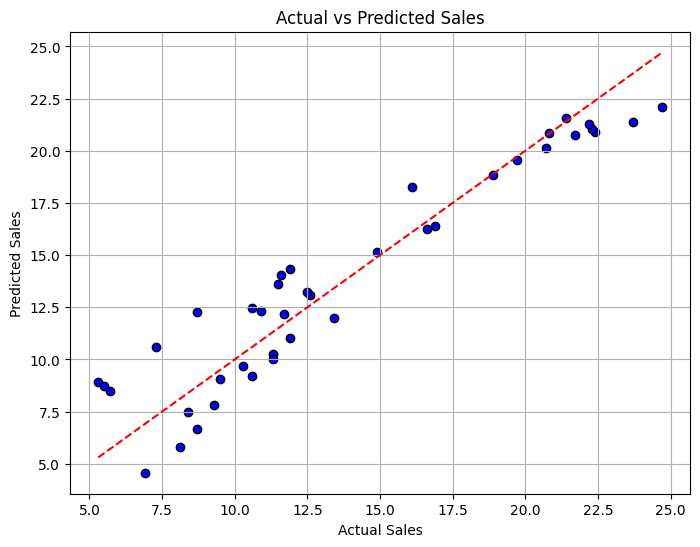

In [13]:
plt.figure(figsize=(8, 6))
plt.scatter(Y_test, Y_pred, color='blue', edgecolors='k')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # garis ideal
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Actual vs Predicted Sales")
plt.grid(True)
plt.show()


Simpan Model ke File .pkl

In [14]:
# Buat folder jika belum ada
os.makedirs("models", exist_ok=True)

# Simpan model
with open("models/linear_model.pkl", "wb") as file:
    pickle.dump(model, file)

print("Model berhasil disimpan ke 'models/linear_model.pkl'")


Model berhasil disimpan ke 'models/linear_model.pkl'
